In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


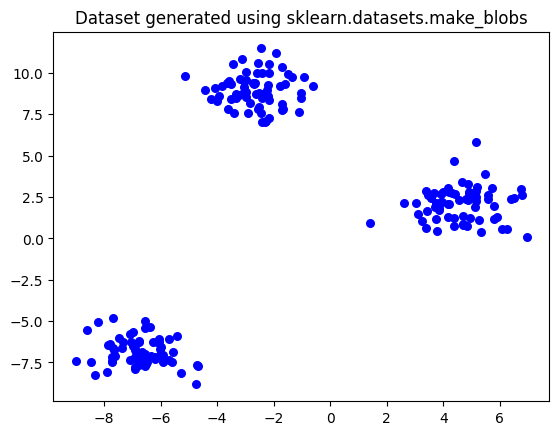

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create the dataset
# make_blobs generate sampel point grouped into guassian-like cluster
X,y_true = make_blobs(
    n_samples=200,  # total number of point
    centers=3,      # number of cluster
    cluster_std=1.0, # standard deviation 
    random_state=42
)

# visualize the data 
plt.scatter(X[:,0],X[:,1],s=30,c='blue')
plt.title("Dataset generated using sklearn.datasets.make_blobs")
plt.show()




In [19]:
k=3 # number of cluster 
n,d= X.shape
np.random.seed(42)

centroids= X[np.random.choice(n,k,replace=False)]

def compute_distance(X,centroids):

    distances= np.zeros((n,k))
    for j in range(k):
        diff= X- centroids[j]
        distances[:,j]= np.sum(diff**2,axis=1)
    
    return distances


def update_centroids(X,labels,k):
    new_centroids= np.zeros((k,X.shape[1]))
    for j in range(k):
        cluster_points=X[labels==j]
        if len(cluster_points)>0:
            new_centroids[j]= np.mean(cluster_points,axis=0)
        else:
            new_centroids[j]= X[np.random.randit(0,n)]
    
    return new_centroids
    


In [20]:
max_iteration= 100
tol= 1e-4

for iteration in range(max_iteration):
    # compute distance
    distances= compute_distance(X,centroids)
    labels= np.argmin(distances,axis=1)

    new_centroids= update_centroids(X,labels,k)

    # check for convergence 

    shift = np.sum((new_centroids - centroids)**2)
    print(f"Iteration {iteration+1}: centroid shift = {shift:.4f}")


    if shift < tol:
        print("Converged!")
        break

    centroids = new_centroids


print("\nFinal centroids:")
print(centroids)



Iteration 1: centroid shift = 22.4682
Iteration 2: centroid shift = 0.0727
Iteration 3: centroid shift = 0.0073
Iteration 4: centroid shift = 0.0109
Iteration 5: centroid shift = 0.0810
Iteration 6: centroid shift = 0.0258
Iteration 7: centroid shift = 0.0069
Iteration 8: centroid shift = 0.0048
Iteration 9: centroid shift = 0.0024
Iteration 10: centroid shift = 0.0011
Iteration 11: centroid shift = 0.0000
Converged!

Final centroids:
[[-6.97155487 -6.00590629]
 [-6.59838912 -7.40104247]
 [ 0.98668049  5.52939099]]


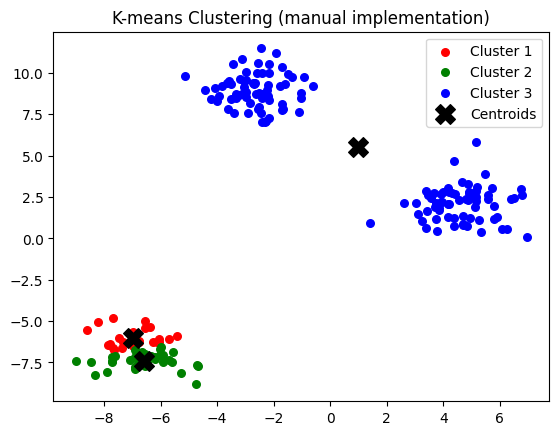

In [21]:
colors = ['red', 'green', 'blue']
for j in range(k):
    cluster_points = X[labels == j]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, c=colors[j], label=f"Cluster {j+1}")

# plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.legend()
plt.title("K-means Clustering (manual implementation)")
plt.show()